In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import signal, stats
import os
import pandas as pd

In [2]:

def getData_half(cfileName):
    """
    Reads only the first half of the complex samples from a .cfile.
    The file is assumed to contain interleaved float32 I and Q samples.
    """
    # Get file size in bytes
    file_size = os.path.getsize(cfileName)
    # Determine total number of float32 samples in the file
    num_floats = file_size // 4
    # Each complex sample requires 2 floats.
    # The full complex array would have num_floats//2 elements.
    # To get only half of that, we need to read:
    count = (num_floats // 4) * 2  # (num_floats//4 complex samples)
    
    # Read only 'count' float32 numbers from the file
    data = np.fromfile(cfileName, dtype="float32", count=count)
    
    # Form complex samples: every pair (I, Q)
    data_complex = data[0::2] + 1j * data[1::2]
    
    return data_complex

In [3]:
num_samp_per_class = 10000
fs = 20e6        # sampling frequency
fft_size = 2048  # FFT window size
fft_overlap = 256  # overlap between segments

In [4]:
ping_first = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_first")
print(ping_first.shape)

(211288125,)


In [5]:
f_ping_first, t_ping_first, Zxx_ping_first = signal.stft(ping_first, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_ping_first = Zxx_ping_first.transpose()

Zxx_selected__ping_first = Zxx_ping_first[:num_samp_per_class]


print("Zxx_ping_first shape:", Zxx_ping_first.shape)
print("Selected STFT data shape:", Zxx_selected__ping_first.shape)
del ping_first, Zxx_ping_first, f_ping_first, t_ping_first


/tmp/ipykernel_43591/4196341126.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_ping_first, t_ping_first, Zxx_ping_first = signal.stft(ping_first, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_ping_first shape: (117908, 2048)
Selected STFT data shape: (10000, 2048)


In [6]:
mag_ping_first = np.abs(Zxx_selected__ping_first)
del Zxx_selected__ping_first
power_ping_first = np.mean(mag_ping_first, axis=1)  # shape: (time_segments,)
del mag_ping_first

In [7]:
ping_middle = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_middle")
print(ping_middle.shape)

(214828233,)


In [8]:
f_ping_middle, t_ping_middle, Zxx_ping_middle = signal.stft(ping_middle, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_ping_middle = Zxx_ping_middle.transpose()

Zxx_selected__ping_middle = Zxx_ping_middle[:num_samp_per_class]


print("Zxx_ping_middle shape:", Zxx_ping_middle.shape)
print("Selected STFT data shape:", Zxx_selected__ping_middle.shape)
del ping_middle, Zxx_ping_middle, f_ping_middle, t_ping_middle

/tmp/ipykernel_43591/3529992797.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_ping_middle, t_ping_middle, Zxx_ping_middle = signal.stft(ping_middle, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_ping_middle shape: (119883, 2048)
Selected STFT data shape: (10000, 2048)


In [9]:
mag_ping_middle = np.abs(Zxx_selected__ping_middle)
del Zxx_selected__ping_middle
power_ping_middle = np.mean(mag_ping_middle, axis=1)  # shape: (time_segments,)
del mag_ping_middle

In [10]:
ping_last = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_last")
print(ping_last.shape)

(212337083,)


In [11]:
f_ping_last, t_ping_last, Zxx_ping_last = signal.stft(ping_last, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
Zxx_ping_last = Zxx_ping_last.transpose()

Zxx_selected__ping_last = Zxx_ping_last[:num_samp_per_class]


print("Zxx_ping_last shape:", Zxx_ping_last.shape)
print("Selected STFT data shape:", Zxx_selected__ping_last.shape)
del ping_last, Zxx_ping_last, f_ping_last, t_ping_last

/tmp/ipykernel_43591/2808974606.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f_ping_last, t_ping_last, Zxx_ping_last = signal.stft(ping_last, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)


Zxx_ping_last shape: (118493, 2048)
Selected STFT data shape: (10000, 2048)


In [12]:
mag_ping_last = np.abs(Zxx_selected__ping_last)
del Zxx_selected__ping_last
power_ping_last = np.mean(mag_ping_last, axis=1)  # shape: (time_segments,)
del mag_ping_last

In [13]:
F_stat, p_value = stats.f_oneway(power_ping_first, power_ping_middle, power_ping_last)

print("ANOVA F-statistic:", F_stat)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 2.6018205
ANOVA p-value: 0.07415522


/tmp/ipykernel_43591/3822079993.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


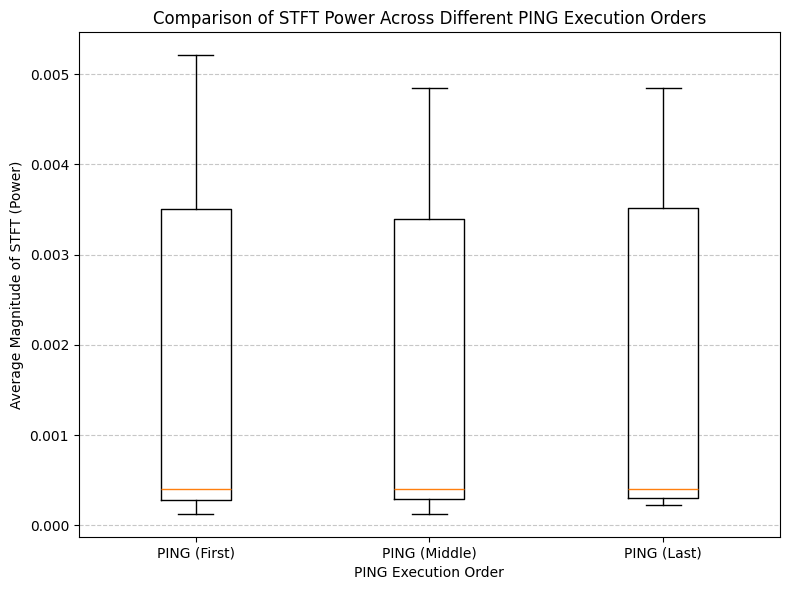

In [15]:


# Suppose you already computed these arrays:
# power_ping_first, power_ping_middle, power_ping_last

# 1) Combine them into a list of arrays for the box plot:
boxplot_data = [
    power_ping_first,
    power_ping_middle,
    power_ping_last
]

# 2) Create a box plot:
plt.figure(figsize=(8, 6))
plt.boxplot(
    boxplot_data,
    labels=["PING (First)", "PING (Middle)", "PING (Last)"]
)

# 3) Add plot decorations:
plt.title("Comparison of STFT Power Across Different PING Execution Orders")
plt.xlabel("PING Execution Order")
plt.ylabel("Average Magnitude of STFT (Power)")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

